In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import pandas as pd

# Some data from Fbref / StatsBomb

In [2]:
df = pd.DataFrame({'team': ['Amiens', 'Angers', 'Bordeaux'],
                   'pressure1': [1521, 1635, 1379],
                   'pressure2': [2436, 2535, 2361],
                   'pressure3': [989, 999, 985]})

# Draw on pitch

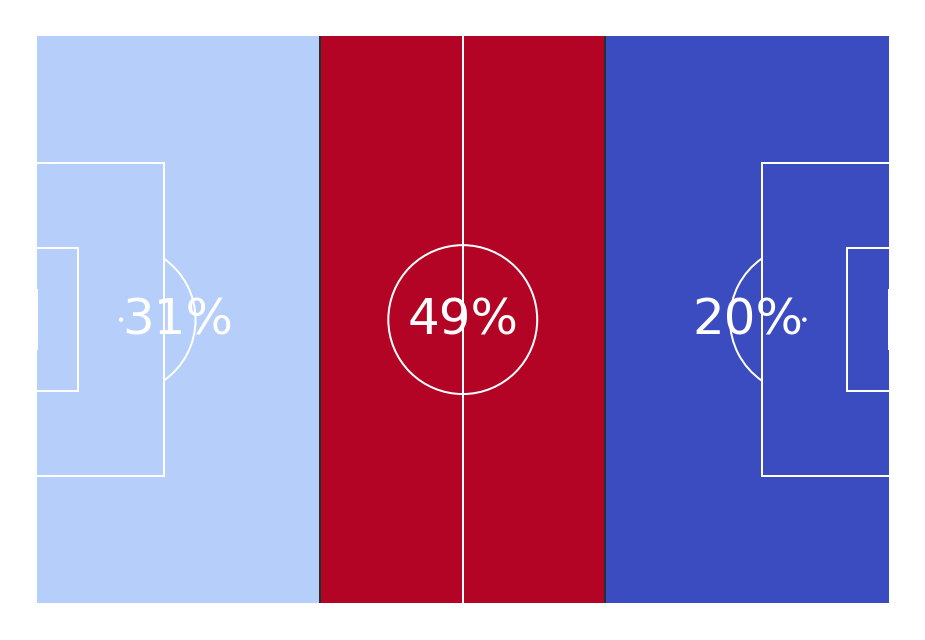

In [3]:
pitch = Pitch(line_zorder=2, line_color='white', figsize=(16, 9))
fig, ax = pitch.draw()
# get a binned statistic for one point (0, 0)
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3,1))
# replace with the fbref values
bin_statistic['statistic'] = df.loc[df.team=='Amiens', ['pressure1', 'pressure2', 'pressure3']].values
# plot the heatmap
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', edgecolors='#22312b')
# replace the numbers with the percentage
bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                              .applymap(lambda x: '{:.0%}'.format(x))
                              .values)
# plot the labels
annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=50, ax=ax, ha='center', va='center')